In [53]:
import scanpy as sc
import cospar as cs
import os

In [54]:
os.chdir('F:\\CJP_cellfate\\data\\cospar')
cs.logging.print_version()
cs.settings.verbosity = 2
cs.settings.data_path = "LARRY_data"  # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path = "LARRY_figure"  # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(
    format="png", figsize=[4, 3.5], dpi=75, fontsize=14, pointsize=2
)

Running cospar 0.3.1 (python 3.10.8) on 2023-10-10 15:25.


In [3]:
adata = sc.read_h5ad('F:\\CJP_cellfate\\data\\larry_cospar.h5')

In [17]:
adata_label = sc.read_h5ad('E:\\public\larry\\larry_mono_neu.h5ad')

In [31]:
adata_label 

AnnData object with n_obs × n_vars = 5392 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth', 'label'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'label_colors', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_emb', 'X_pca'

In [9]:
cs.tl.progenitor(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
    bias_threshold_A=0.5,
    bias_threshold_B=0.5,
    sum_fate_prob_thresh=0.2,
    avoid_target_states=True,
)

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']
Results saved at adata.obs[f'progenitor_transition_map_Neutrophil'] and adata.obs[f'diff_trajectory_transition_map_Neutrophil']
Results saved at adata.obs[f'progenitor_transition_map_Monocyte'] and adata.obs[f'diff_trajectory_transition_map_Monocyte']


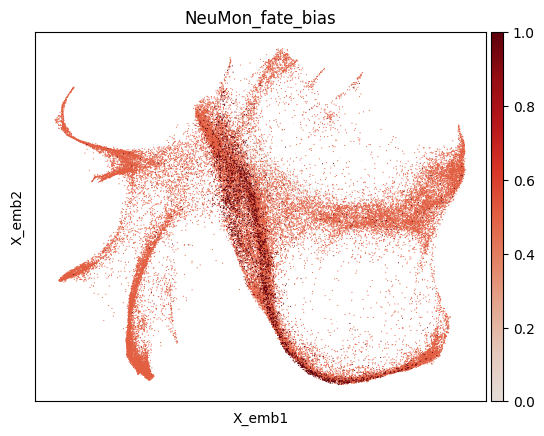

In [16]:
cs.pl.embedding(adata, color="NeuMon_fate_bias")

In [36]:
### neu acc
true_neu_prog = adata_label.obs.label[adata_label.obs.label=='Neutrophil_prog'].index.tolist()
pred_neu_prog = adata.obs.progenitor_transition_map_Neutrophil[adata.obs.progenitor_transition_map_Neutrophil==1].index.tolist()
true_num = 0
for i in pred_neu_prog:
    if i in true_neu_prog:
        true_num+=1
true_num/len(true_neu_prog)

0.8631459398069279

In [34]:
adata_pred = adata[adata_label.obs_names]
adata_pred

View of AnnData object with n_obs × n_vars = 5392 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth', 'fate_map_transition_map_Neutrophil', 'fate_map_transition_map_Monocyte', 'fate_bias_transition_map_Neutrophil*Monocyte', 'progenitor_transition_map_Neutrophil', 'diff_trajectory_transition_map_Neutrophil', 'progenitor_transition_map_Monocyte', 'diff_trajectory_transition_map_Monocyte'
    uns: 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'available_map', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'clonal_time_points', 'data_des', 'fate_bias_params', 'fate_map_params', 'fate_potency_tmp', 'intraclone_transition_map', 'neighbors', 'progenitor_Monocyte_colors', 'sp_idx', 'state_

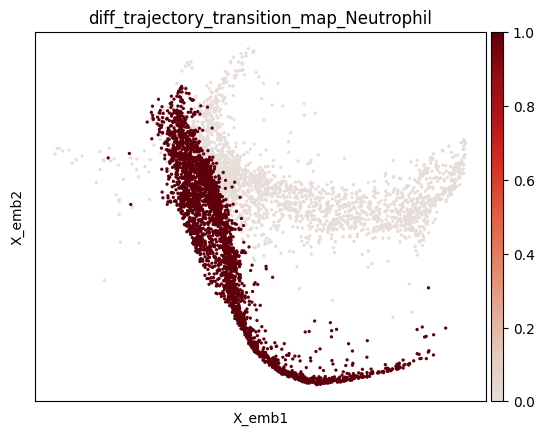

In [35]:
cs.pl.embedding(adata_pred, color="diff_trajectory_transition_map_Neutrophil")

In [48]:
### overall acc
cospar_pred = adata_pred.obs.diff_trajectory_transition_map_Neutrophil[adata_label.obs.label.isin(['Monocyte_prog','Neutrophil_prog'])]
cospar_pred=cospar_pred.replace(1,'Neutrophil_prog')
cospar_pred=cospar_pred.replace(0,'Monocyte_prog')
true_label = adata_label[cospar_pred.index]
true_num = 0
for i in cospar_pred.index:
    if cospar_pred[i] == adata_label.obs.label[i]:
        true_num += 1
true_num/len(cospar_pred)

0.8061284619917501

In [55]:
### state info
adata_2 = cs.tmap.infer_Tmap_from_state_info_alone(
    adata,
    initial_time_points=['2','4'],
    later_time_point="6",
    initialize_method="OT",
    OT_cost="GED",
    smooth_array=[20, 15, 10],
    max_iter_N=[1, 3],
    sparsity_threshold=0.2,
)

Step I: Generate pseudo clones where each cell has a unique barcode-----
Step II: Perform joint optimization-----


C:\Users\peiweike\.conda\envs\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


MemoryError: Unable to allocate 10.8 GiB for an array with shape (49116, 29569) and data type float64

In [ ]:
adata_pred = adata2[adata_label.obs_names]
cospar_pred = adata_pred.obs.diff_trajectory_transition_map_Neutrophil[adata_label.obs.label.isin(['Monocyte_prog','Neutrophil_prog'])]
cospar_pred=cospar_pred.replace(1,'Neutrophil_prog')
cospar_pred=cospar_pred.replace(0,'Monocyte_prog')
true_label = adata_label[cospar_pred.index]
true_num = 0
for i in cospar_pred.index:
    if cospar_pred[i] == adata_label.obs.label[i]:
        true_num += 1
true_num/len(cospar_pred)